Importing Libraries


In [ ]:
pip install keras


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dropout, Dense, Embedding, LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Loading Datasets

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preprocessing Data

In [ ]:
def preprocess_text(text):
  text = re.sub(r'<[^>]+>', '', text)
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = text.lower()
  stop_words = set(stopwords.words('english'))
  words = text.split()
  words = [word for word in words if word.lower() not in stop_words]
  lemmatizer = WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word) for word in words]
  return ' '.join(words)
x_train_text = [' '.join([reverse_word_index.get(i - 3, '?') for i in sequence]) for sequence in x_train]
x_test_text = [' '.join([reverse_word_index.get(i - 3, '?') for i in sequence]) for sequence in x_test]
x_train_text = [preprocess_text(text) for text in x_train_text]
x_test_text = [preprocess_text(text) for text in x_test_text]
maxlen= 200
tokenizer= Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train_text)
x_train_seq = tokenizer.texts_to_sequences(x_train_text)
x_test_seq = tokenizer.texts_to_sequences(x_test_text)
x_train = pad_sequences(x_train_seq, maxlen=maxlen)
x_test = pad_sequences(x_test_seq, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)

Model Building and compiling

In [ ]:
n_unique_words = 10000
maxlen= 200
model = Sequential()
model.add(Embedding(n_unique_words, 64, input_length=maxlen))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 194ms/step - accuracy: 0.6731 - loss: 0.5980 - val_accuracy: 0.8638 - val_loss: 0.3278
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 43s 207ms/step - accuracy: 0.9064 - loss: 0.2548 - val_accuracy: 0.8730 - val_loss: 0.3119
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 184ms/step - accuracy: 0.9403 - loss: 0.1800 - val_accuracy: 0.8685 - val_loss: 0.3614
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 37s 191ms/step - accuracy: 0.9557 - loss: 0.1365 - val_accuracy: 0.8593 - val_loss: 0.3534
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 198ms/step - accuracy: 0.9635 - loss: 0.1152 - val_accuracy: 0.8579 - val_loss: 0.3958
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 186ms/step - accuracy: 0.9743 - loss: 0.0900 - val_accuracy: 0.8583 - val_loss: 0.4386
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - accuracy: 0.9758 - loss: 0.0868 - val_accuracy: 0.8564 - val_loss: 0.5107
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 187ms/step - accuracy: 0.9707 - loss: 0

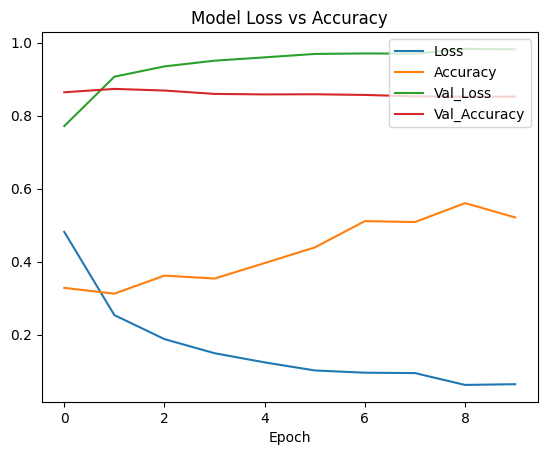

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The sample text is predicted as positive with confidence: 0.9351952075958252


In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss vs Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy', 'Val_Loss', 'Val_Accuracy'], loc='upper right')
plt.show()
sample_text = "This is a great movie with fantastic performances!"
sample_text = preprocess_text(sample_text)
tokenized_sample = tokenizer.texts_to_sequences([sample_text])
padded_sample = pad_sequences(tokenized_sample, maxlen=maxlen)
prediction = model.predict(padded_sample)
threshold = 0.5
if prediction[0][0] > threshold:
  print(f"The sample text is predicted as positive with confidence: {prediction[0][0]}")
else:
  print(f"The sample text is predicted as negative with confidence: {1 - prediction[0][0]}")